In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as pt
%matplotlib inline
from scipy.io import loadmat
import decimal
data=loadmat(r'C:\Users\saminens\Desktop\ML\ex7data2')

In [2]:
X=data['X']
X

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

In [3]:
def findclosestcentroids(X, centroids):
    m=X.shape[0]
    idx=np.zeros(m)
    for i in range (m):
        dist=np.sum(np.square(X[i,:]-centroids),axis=1)
        idx[i]=np.argmin(dist)
                   
    return idx

In [4]:
initialc=np.array([[3, 3], [6, 2], [8, 5]])
idx=findclosestcentroids(X, initialc)
idx[0:3] #check for 3 K's

array([ 0.,  2.,  1.])

In [5]:
def computecentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    for i in range (K):
        x=X[idx==i]
        if x.shape[0]>0:
            avg=np.mean(x,axis=0)
            centroids[i,:]=avg
    return centroids
        
    

In [6]:
K=3
centroids = computecentroids(X, idx, K)
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

In [7]:
def plotdatapts(X,idx,K):
    color=cm.rainbow(np.linspace(0,1,K))
    pt.scatter(X[:,0],X[:,1],c=color[idx.astype(int),:])

In [8]:
def draw_line(p1,p2,dash=False):
    if dash:
        pt.plot([p1[0], p2[0]], [p1[1], p2[1]], '--',color='k')
    else:
        pt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='k')

In [9]:
def plotprogresskmeans(X,previous,idx,K,i):
    plotdatapts(X,idx,K)
    pt.plot(previous[0:i+1,:,0],previous[0:i+1,:,1])
    pt.title('iteration number {}'.format(i+1))
    for a in range (previous.shape[1]):                      #a is the index of centroid
        for b in range(i):                                   #b is the index of the iteration
            draw_line(previous[b,a,:],previous[b+1,a,:])

In [10]:
def Kmeans(X,initial_centroids,max_iters,plot_progress):
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=np.zeros((max_iters, centroids.shape[0], centroids.shape[1]))
    idx=np.zeros(m)
    for i in range (max_iters):
        previous_centroids[i,:]=centroids
        idx=findclosestcentroids(X,centroids)
        if plot_progress:
            pt.figure()
            plotprogresskmeans(X,previous_centroids, idx, K, i)
            pt.show()

        centroids = computecentroids(X, idx, K)

    return centroids, idx

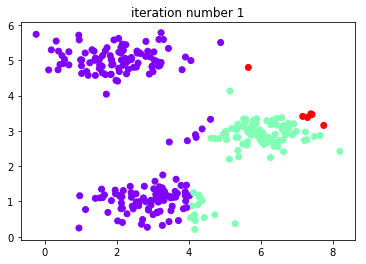

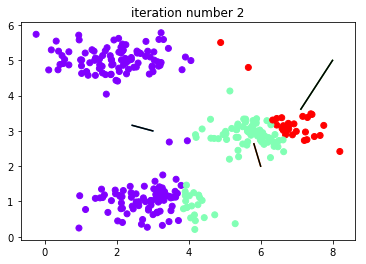

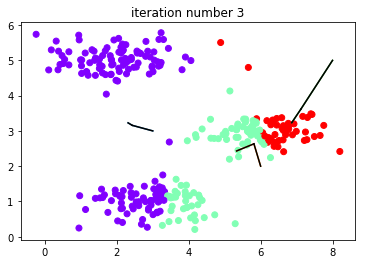

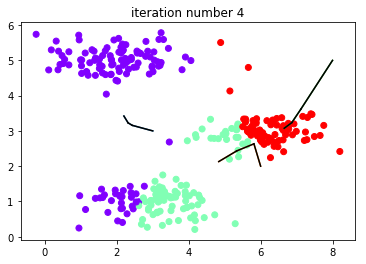

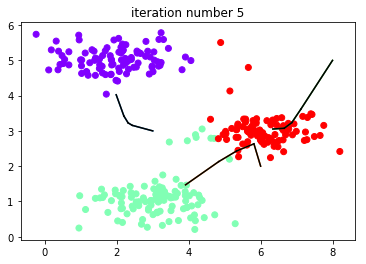

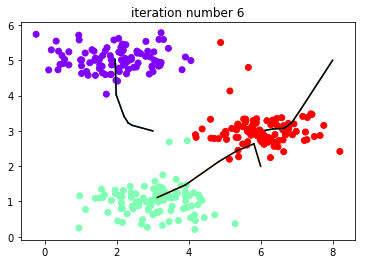

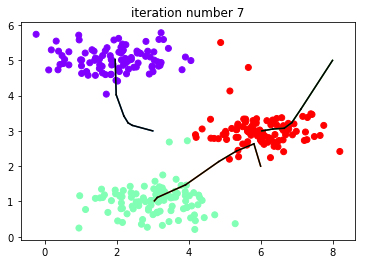

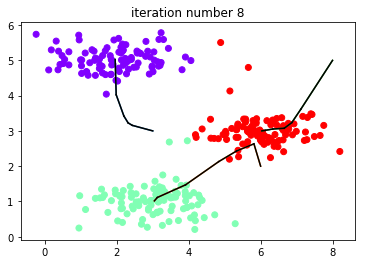

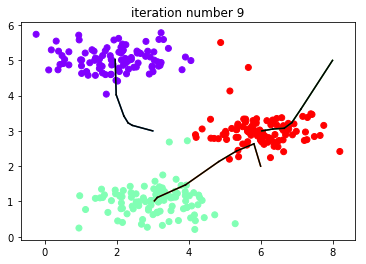

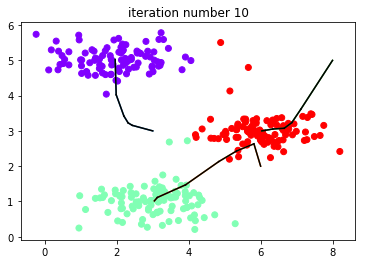

In [11]:
K=3
max_iters=10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
centroids, idx = Kmeans(X, initial_centroids, max_iters, True)

In [12]:
#k-means on pixels
def kmeans_initialcentroids(X,K):
    m,n=X.shape
    rand_idx=np.random.permutation(m)
    centroids=X[rand_idx[0:K],:]
    return centroids

In [13]:
A = loadmat(r'C:\Users\saminens\Desktop\ML\bird_small')
A = A['A']/255    #Divide by 255 so that all values are in the range 0 - 1
img_size=A.shape
X=A.reshape([img_size[0]*img_size[1],img_size[2]])
K=16    #no of colours to be compressed
max_iters=10
initial_centroids=kmeans_initialcentroids(X,K)
centroids,idx=Kmeans(X,initial_centroids,max_iters,plot_progress=False)

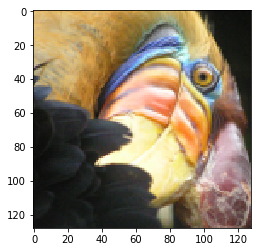

In [14]:
idx=findclosestcentroids(X, centroids)
X_recovered = centroids[idx.astype(int), :]
X_recovered = X_recovered.reshape(img_size)
pt.imshow(A)
pt.show()

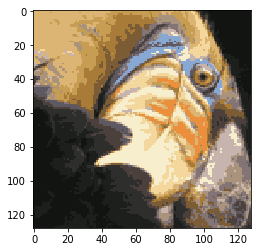

In [15]:
pt.imshow(X_recovered)
pt.show()